# Chapter 6: EDA of the aging problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-paper')
plt.rc('text', usetex=False)

# 0. Load raw data

In [2]:
df = pd.read_csv('../../data/aging_data.csv', header=0, index_col=0)
df.head()

,gender,age,CO-Pyr/Mal,CO-Succinate,ATP-Pyr/Mal,ATP-Succinate,PO-Pyr/Mal,PO-Succinate,ATP,AMP,ATP/AMP,MDA,LDH
campione,,,,,,,,,,,,,
#271/2016,f,9,6.53,9.18,20.642016,10.120000,3.161105,1.102397,0.289389,0.072347,4.000000,1.961658,202.572347
#08/2017,m,8,11.42,8.16,30.920777,11.240000,2.707599,1.377451,0.281350,0.096463,2.916667,0.624164,144.694534
#250/2016,m,10,18.56,11.73,43.274765,23.303857,2.331615,1.986689,0.273312,0.080386,3.400000,1.515827,192.926045
#251/2016,f,10,17.94,11.79,51.199060,23.508654,2.853905,1.993949,0.321543,0.088424,3.636364,0.624164,185.423365
#252/2016,m,10,16.83,11.32,34.307632,18.547368,2.038481,1.638460,0.265273,0.060289,4.400000,1.069996,197.213290


# 1. Show some basic statistics

118 subjects
8 - 106


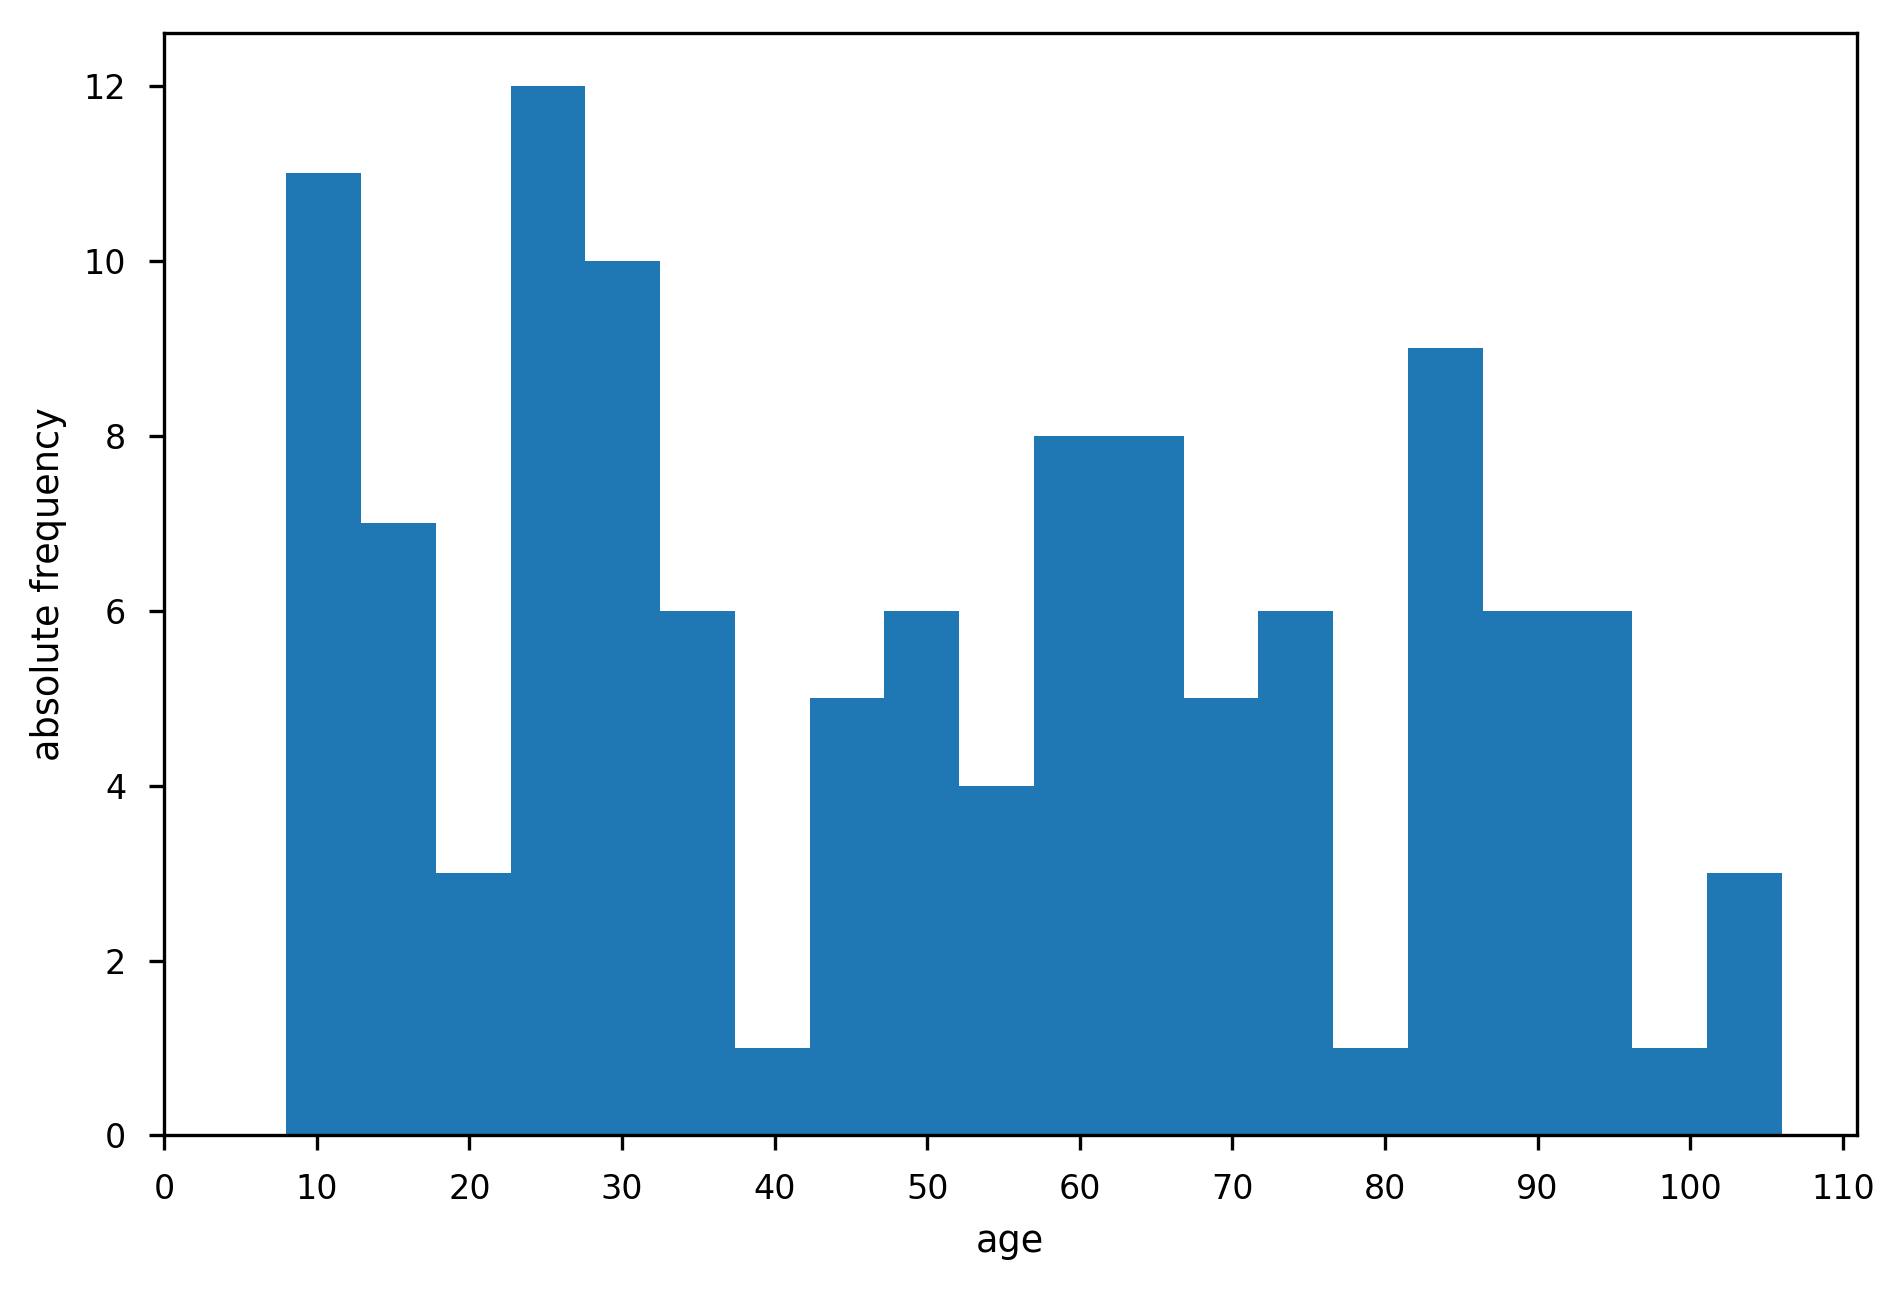

In [3]:
# Plot the histogram of the ages
plt.figure(dpi=300)

plt.hist(df['age'], bins=20)
plt.xlabel('age')
plt.ylabel('absolute frequency')
plt.tight_layout()
plt.xticks(np.arange(0,120,10), np.arange(0,120,10))

plt.savefig('../../images/aging_agehist.png');

print('{} subjects'.format(len(df['age'])))
print('{} - {}'.format(df['age'].min(), df['age'].max()))

In [4]:
np.arange(1, 120, 10)

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111])

In [5]:
# Make the boxplots per decade
def group_boxplot(X, y):        
    group_ages = np.arange(1, 120, 10)
    Xg = [] # grouped X
    for g in group_ages[1:]:
        idx = np.where(np.logical_and(y >= g-10, y < g))[0]
        if len(idx)>0:
            Xg.append(X[idx])
        else:
            Xg.append([None])
    return Xg

In [6]:
columns = df.columns.drop(['age', 'gender'])
X, y = df[columns], df['age']

In [7]:
# fixing the units of measurements
units = {}
units['ATP'] = r'mM/ml'
units['AMP'] = units['ATP']
units['ATP/AMP'] = '' # this is just a number
units['CO-Pyr/Mal'] = r'nmol O$_2$/(min $\cdot$ mg)'
units['CO-Succinate'] = units['CO-Pyr/Mal']
units['ATP-Pyr/Mal'] = r'nmol ATP/(min $\cdot$ mg)'
units['ATP-Succinate'] = units['ATP-Pyr/Mal']
units['PO-Pyr/Mal'] = r'nmol ATP/nmol O$_2$'
units['PO-Succinate'] = units['PO-Pyr/Mal']
units['LDH'] = r'U/mg'
units['MDA'] = r'$\mu$M/ml'

In [8]:
xticks = ['0-10', '11-20', '21-30',
          '31-40', '41-50', '51-60',
          '61-70', '71-80', '81-90',
          '91-100', '>100']

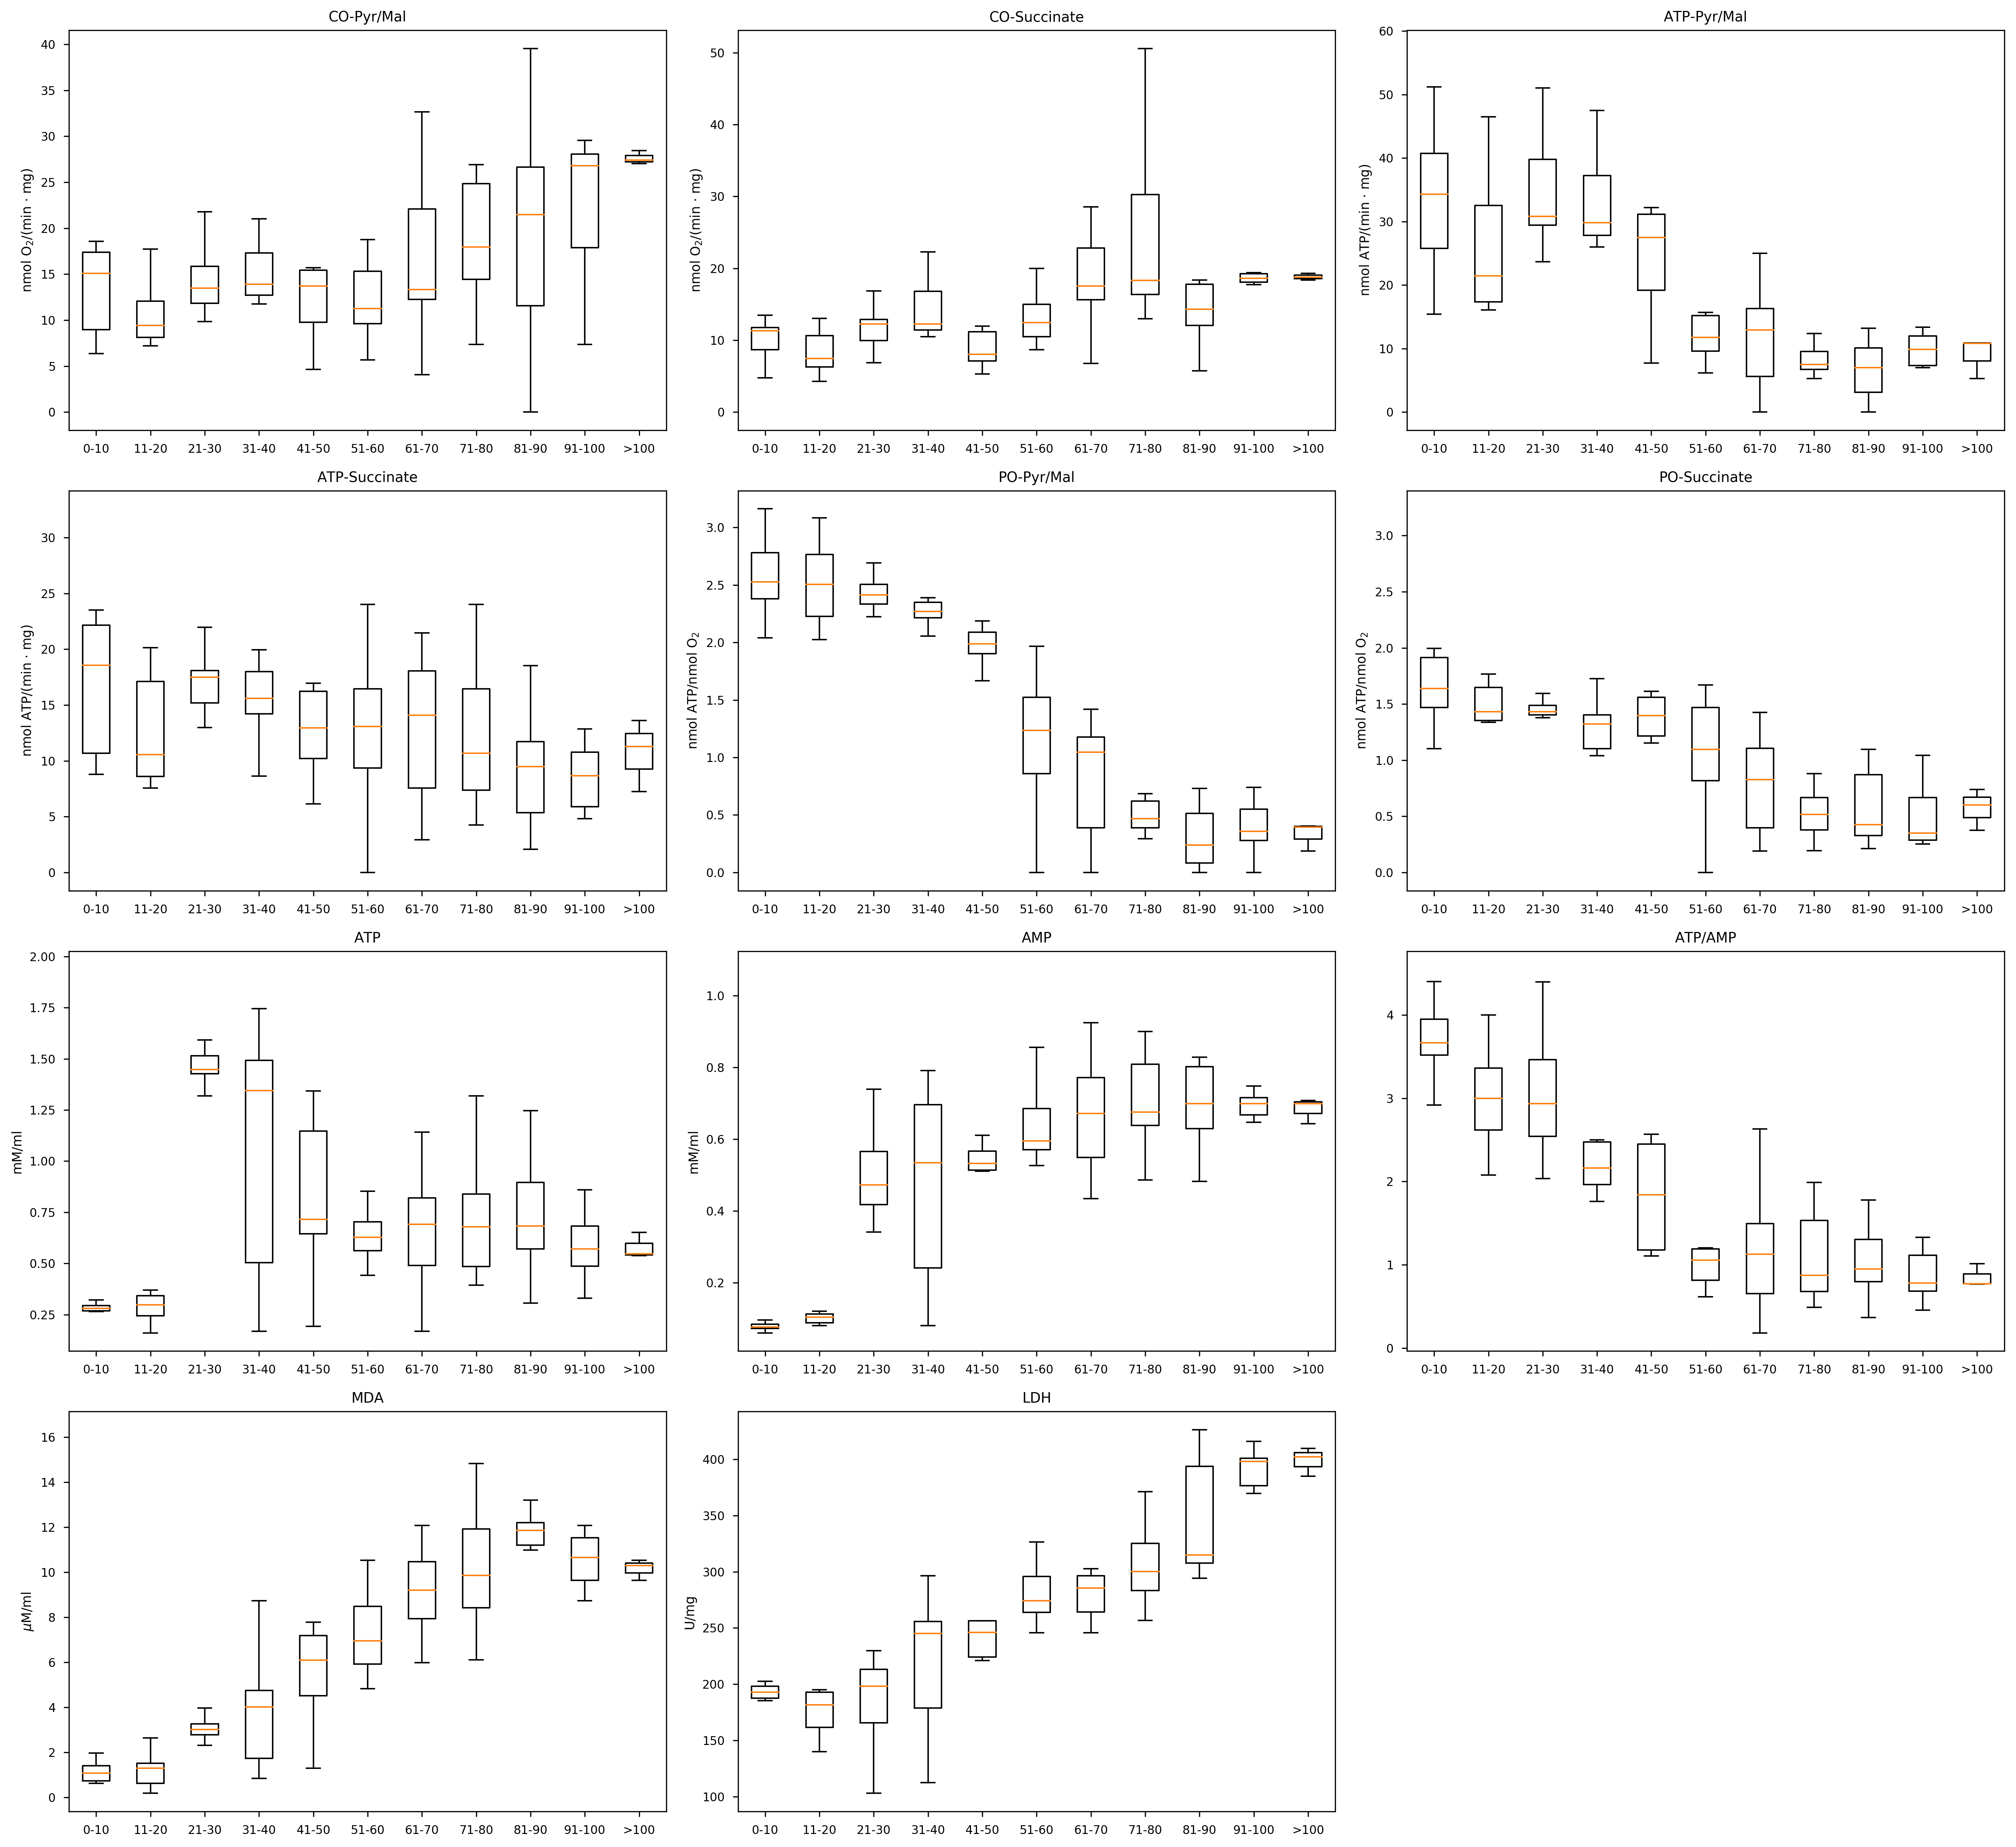

In [10]:
plt.figure(dpi=300, figsize=(3*6.4, 4*4.4))

for i, c in enumerate(columns):
    # Exclude missing data
    _X = X[c].dropna()
    idx = _X.index
    
    # Make boxplot
    Xg = group_boxplot(_X.values, y.loc[idx].values)
    
    # Plot
    plt.subplot(4, 3, i+1)
    plt.boxplot(Xg)
    plt.title(c)
    plt.xticks(range(1,12), xticks, visible=True)
    plt.ylabel(units[c])

plt.tight_layout()
plt.savefig('../../images/aging_boxplot.png');